### Chapter 2: Physics of Sports

In [1]:
# import modules
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras

#### Kinetics: Explaining Motion

First Law of Motion: Inertia

Momentum is the amount of motion defined as the product of the mass of the body to its velocity where:  

<center>momentum = mass * velocity</center>
<center>$p = m * v$</center>  

The unit of momentum is $kg * \frac{m}{s}$.

In [2]:
# page 26
# compute the momentum of a quarterback
m = 100
v = 5
p = m * v
print("The momentum is {} kg*m/s.".format(p))

The momentum is 500 kg*m/s.


Impulse is defined as the speed and time of a collision.
<center>impulse = mass * change in velocity * change in time</center>
<center>$I = m * dv *dt$</center>

In [3]:
# end velocity in m/s
v1 = 0

# duration of collision in seconds
dt = 0.5

# change in velocity
dv = v1 - v

# impulse it takes for a tackler to stop a quarterback
I = m * dv * dt
print("The impulse is {} N*s.".format(I))

The impulse is -250.0 N*s.


Second Law of Motion: External Force

<center>force = mass * acceleration</center>
<center>$F = m * a$</center>  
<center>or</center>
<center>$F = m * \frac{dv}{dt}$</center>  

The unit of force is a Newton where:  

<center>$N = kg * \frac{m}{s^2}$</center>

In [4]:
# page 27
# force exerted by the tackler on the quarterback
F = m * dv / dt
print("The force exerted by the tackler on the quarterback is {} N.".format(F))

The force exerted by the tackler on the quarterback is -1000.0 N.


#### Kinematics: Projectile Motion

Project 2-1: Calculate and plot a projectile trajectory and find the best range and release angle.

In [5]:
# page 30
# define a function that returns (x, y) for a projectile
def projectile(alpha, time, initial_velocity, gravity=9.81):
    x = initial_velocity * time * np.cos(alpha)
    y = initial_velocity * time * np.sin(alpha) - 0.5 * gravity * time**2
    # limit the range of x and y to ONLY positive results
    x = x[0:np.argmax(y < 0)]
    y = y[0:np.argmax(y < 0)]
    return x, y

In [6]:
# beginning parameters
# release speed in m/s
v0 = 30

# launch angles
angles = np.arange(20, 50, 5)

# time
t = np.linspace(0, 5, 300)

max distance: 91.5m angle=45.0


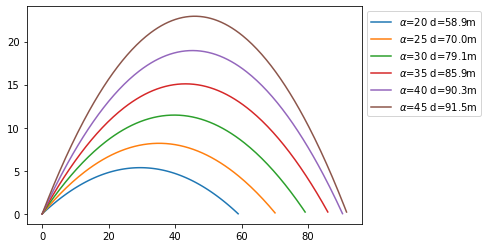

In [7]:
# iterate through the angles to find the best angle and maximum distance
max_distance = 0
best_angle = None

for angle in angles:
    x, y = projectile(angle * np.pi / 180, t, v0)
    distance = x[-1]
    if max_distance < distance:
        max_distance = distance
        best_angle = angle
    plt.plot(x, y, label=r"$\alpha$"+f"={angle:.0f} d={distance:.1f}m")
    plt.legend(bbox_to_anchor=(1, 1));
    
print(f"max distance: {max_distance:.1f}m angle={best_angle:.1f}")

Project 2-2: Train a neural network to predict a projectile range.

In [8]:
# page 32
# define a function to generate projectile data
def projectile_data(size=1000, gravity=9.81):
    # initial velocity
    v0 = np.random.uniform(5, 35, size)
    # initial launch angle
    alpha = np.random.uniform(20, 60, size)
    # calculate the projectile range
    projectile_range = [v0**2 * np.sin(np.deg2rad(2 * alpha)) / gravity]
    # form X and y
    X = np.vstack([v0, alpha]).transpose()
    y = np.reshape(projectile_range, (size, 1))
    return X, y

In [9]:
# create a projectile dataset
X, y = projectile_data(10000)

# confirm the size of each array
X.shape, y.shape

((10000, 2), (10000, 1))

In [10]:
# create training, testing, and validation sets
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.1)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.2)

# confirm the size of each array
print(X_train.shape, X_valid.shape, X_test.shape)
print(y_train.shape, y_valid.shape, y_test.shape)

(7200, 2) (1800, 2) (1000, 2)
(7200, 1) (1800, 1) (1000, 1)


In [11]:
# standardize the input data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [12]:
# create a sequential keras model
model = keras.Sequential([
    keras.layers.Dense(64, activation="relu", input_dim=2),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(1)
])

# compile the model
model.compile(loss="mse", optimizer="rmsprop", metrics=["mae"])

In [13]:
# create an early stopping callback to prevent overtraining
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

In [14]:
# train the model
history = model.fit(X_train, y_train, epochs=500, batch_size=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[early_stopping_cb])

Epoch 1/500
720/720 [==============================] - 1s 742us/step - loss: 499.6422 - mae: 11.4631 - val_loss: 9.7038 - val_mae: 2.3135
Epoch 2/500
720/720 [==============================] - 0s 627us/step - loss: 5.8286 - mae: 1.7954 - val_loss: 3.4428 - val_mae: 1.3529
Epoch 3/500
720/720 [==============================] - 0s 581us/step - loss: 2.3681 - mae: 1.1310 - val_loss: 1.3058 - val_mae: 0.8485
Epoch 4/500
720/720 [==============================] - 0s 575us/step - loss: 1.1498 - mae: 0.7487 - val_loss: 1.1464 - val_mae: 0.7520
Epoch 5/500
720/720 [==============================] - 0s 601us/step - loss: 0.6413 - mae: 0.5557 - val_loss: 0.3567 - val_mae: 0.4059
Epoch 6/500
720/720 [==============================] - 0s 571us/step - loss: 0.4499 - mae: 0.4604 - val_loss: 0.1870 - val_mae: 0.2975
Epoch 7/500
720/720 [==============================] - 0s 580us/step - loss: 0.3636 - mae: 0.4114 - val_loss: 1.0656 - val_mae: 0.8164
Epoch 8/500
720/720 [==============================]

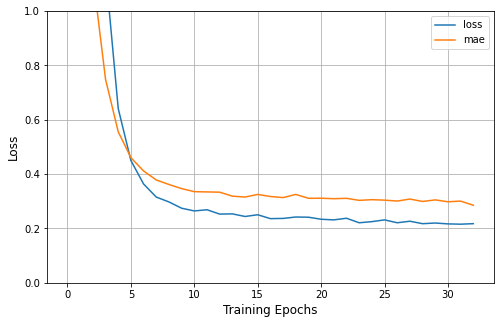

In [15]:
# plot the learning curves
pd.DataFrame(history.history).iloc[:, :2].plot(figsize=(8,5))
plt.xlabel("Training Epochs", fontsize=12)
plt.ylabel("Loss", fontsize=12)
plt.grid(True)
plt.gca().set_ylim(0, 1);

In [16]:
# evaluate the model on the test set
mae_test = model.evaluate(X_test, y_test)

32/32 [==============================] - 0s 873us/step - loss: 0.0162 - mae: 0.0944


In [17]:
# use the model to make a prediction and compare it to the actual range
angle = 45
gravity = 9.81
speed = 30
actual_range = speed**2 * np.sin(np.deg2rad(2 * angle)) / gravity

predicted_range = model.predict(np.array(scaler.transform([(speed, angle)])))

print(f"Actual range: {actual_range}")
print(f"Predicted range: {predicted_range}")

Actual range: 91.74311926605505
Predicted range: [[91.766075]]


#### Angular Motion

Angular First Law: Law of Inertia  

<center>angular momentum = moment of inertia * angular velocity</center>  
<center>$L = l * \omega$</center>

Angular Second Law: Rotational Dynamics  

<center>torque = moment of intertia * angular acceleration</center>  
<center>$\tau = l * \alpha$</center>

In [18]:
# page 35
# estimate the moment of inertia for a figure skater
gravity = 9.81

# set the skater's mass in kg
mass_body = 55
mass_torso = 0.5 * mass_body
mass_arm = 0.06 * mass_body
print("The mass of each arm is {:.2f}kg and the mass of the torso is {:.2f}kg.".format(mass_arm, mass_torso))

The mass of each arm is 3.30kg and the mass of the torso is 27.50kg.


In [19]:
# set the radius of the skater's torso and arms in meters
radius_torso = 0.25
radius_arm = 0.7

In [20]:
# calculate the moment of intertia for the skater's torso and arms
MOI_torso = (1 / 2) * mass_torso * radius_torso**2
MOI_arm = (1 / 3) * mass_arm * radius_arm**2
print("The moment of inertia (arm) is {:.3f}kg*m^2.".format(MOI_arm))
print("The moment of inertia (torso) is {:.3f}kg*m^2.".format(MOI_torso))

The moment of inertia (arm) is 0.539kg*m^2.
The moment of inertia (torso) is 0.859kg*m^2.


In [21]:
# calculate the moment of inertia in and moment of inertia out
MOI_out = MOI_arm * 2 + MOI_torso
MOI_in = MOI_torso
print("The moment of inertia (out) is {:.3f}kg*m^2.".format(MOI_out))
print("The moment of inertia (in) is {:.3f}kg*m^2.".format(MOI_in))

The moment of inertia (out) is 1.937kg*m^2.
The moment of inertia (in) is 0.859kg*m^2.


In [22]:
# set the angular velocity when the arms are out in revolutions per second
w_out = 2

# calculate the angular velocity when the arms are in
w_in = w_out * MOI_out / MOI_in
print("The skater's spin rate when their arms are out is {:.2f}rev/sec.".format(w_out))
print("The skater's spin rate when their arms are in is {:.2f}rev/sec.".format(w_in))

The skater's spin rate when their arms are out is 2.00rev/sec.
The skater's spin rate when their arms are in is 4.51rev/sec.
